In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from numpy.random import normal

from scipy.stats import median_abs_deviation as mad

import muldoon
from muldoon import read_data as rd
from muldoon import met_timeseries as met
from muldoon import utils as ut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processing file: WE__0190___________DER_WS__________________P02.csv
Processing label: WE__0190___________DER_WS__________________P02.xml
Found a Header structure: HEADER
Found a Table_Delimited structure: TABLE
0   Header           'HEADER'  PDS DSV 1
1   Table_Delimited  'TABLE'   11 fields x 38489 records


OSError: Unable to read data from file 'WE__0190___________DER_WS__________________P02.CSV' found in label - [Errno 2] No such file or directory: 'WE__0190___________DER_WS__________________P02.CSV'

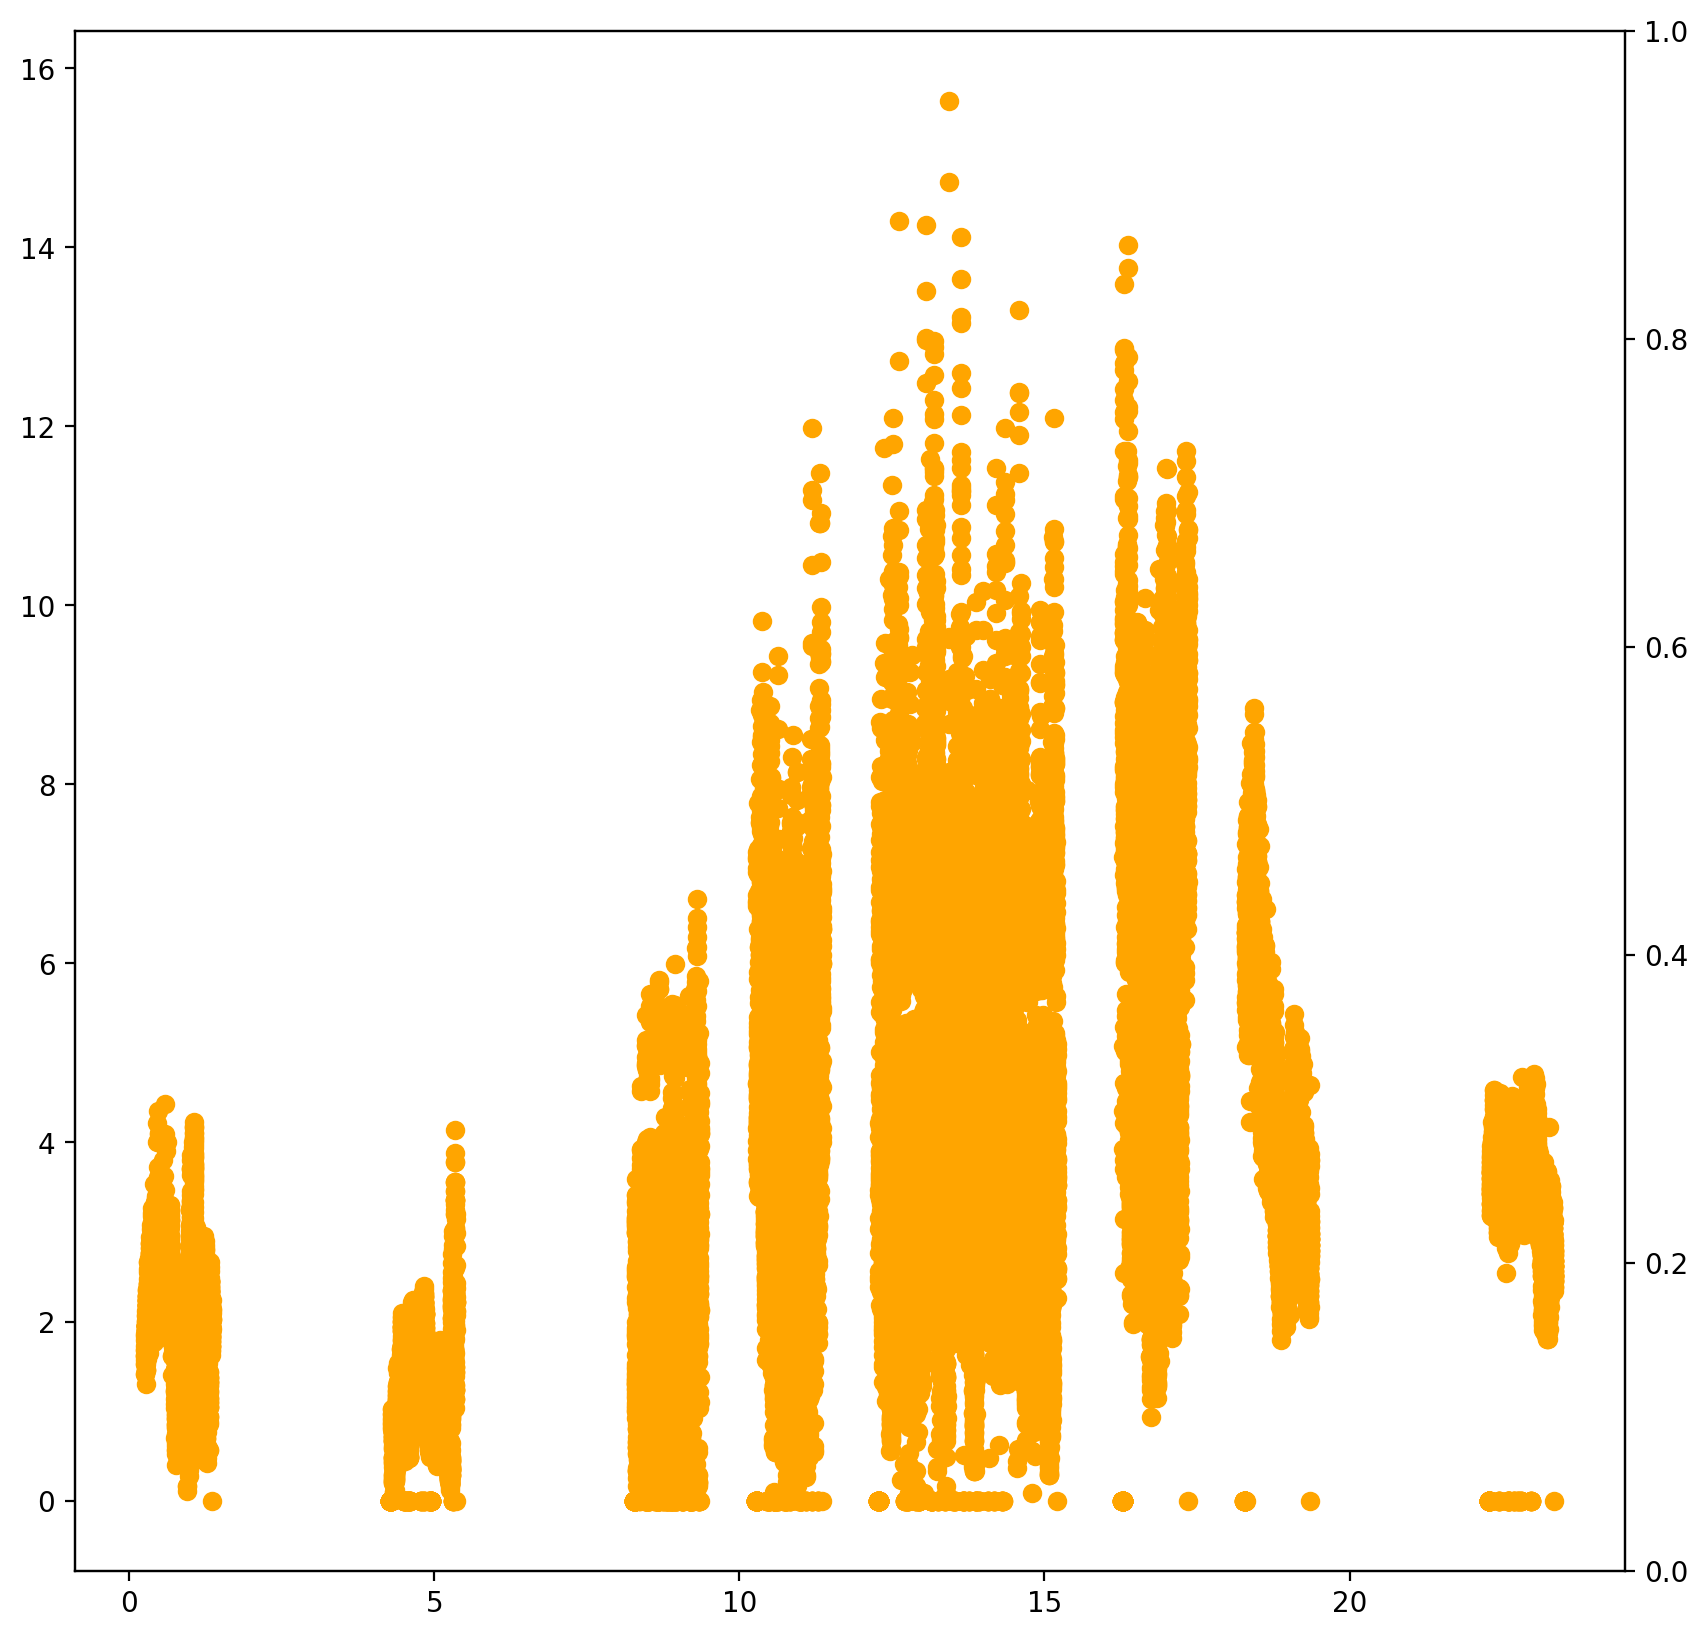

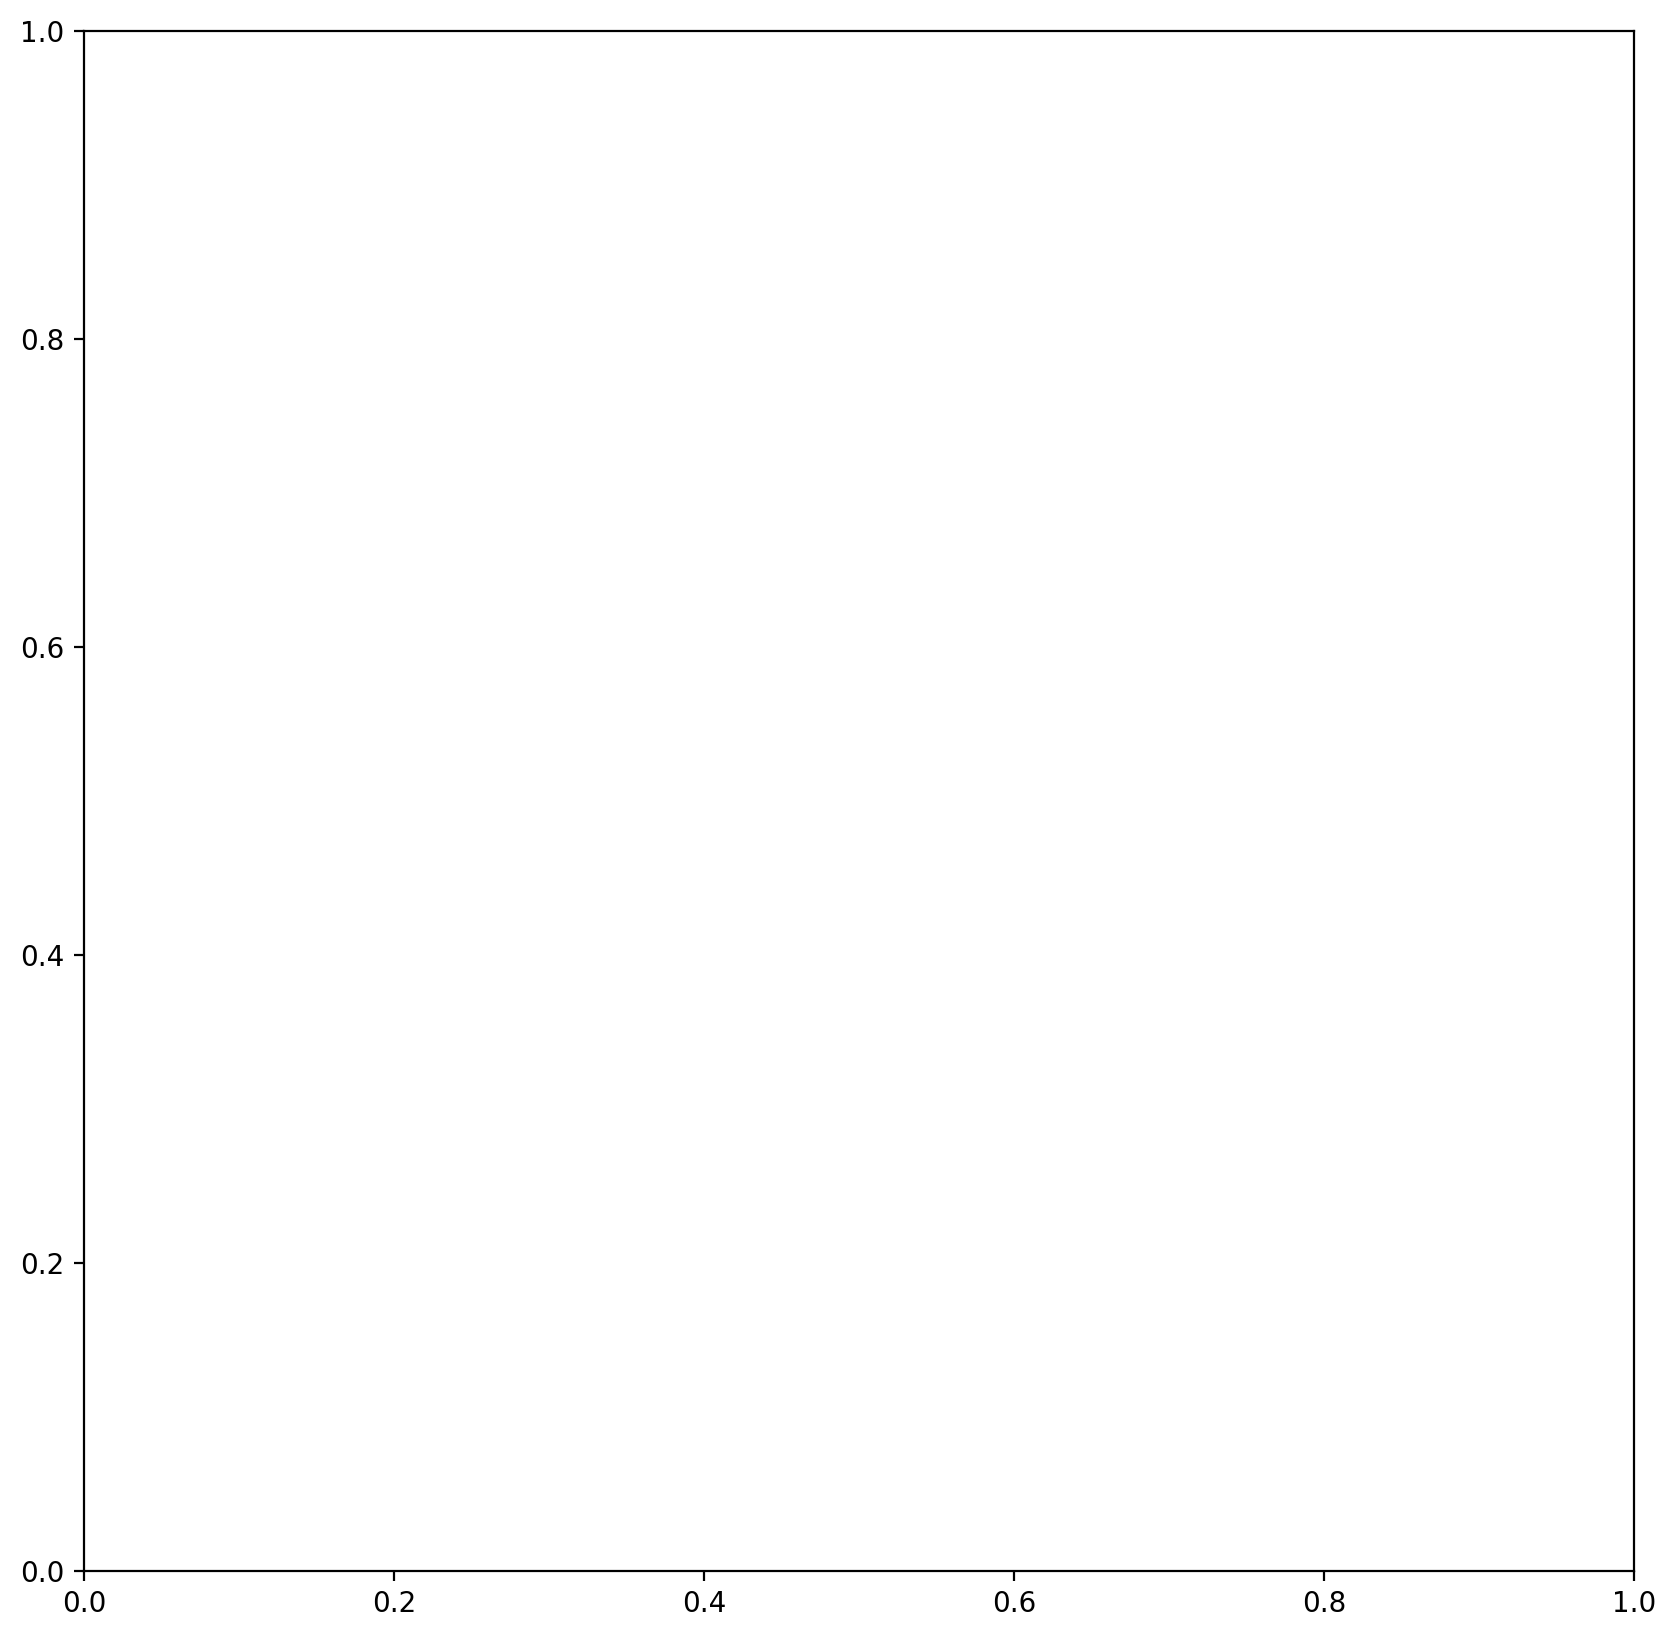

In [4]:
fig = plt.figure(figsize=(10,10))
fig2 = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax3 = fig2.add_subplot(111)
ax2 = ax.twinx()

# Plots time and horizontal wind speed
filename="WE__0190___________DER_WS__________________P02.csv"
time, hor_wind_speed = rd.read_Perseverance_WS_data(filename)
ax.scatter(time, hor_wind_speed, color='orange')

filename2="WE__0190___________DER_WS__________________P02.xml"
time, hor_wind_speed = rd.read_Perseverance_WS_data(filename2)
ax3.scatter(time, hor_wind_speed, color='blue')


In [ ]:
# Tests get_vortex method
result = [time, hor_wind_speed]
vortex = ut.get_vortex(result)
print(vortex)

Text(0.5, 1.0, 'Wind Speed Vortex Profile Over a Time')

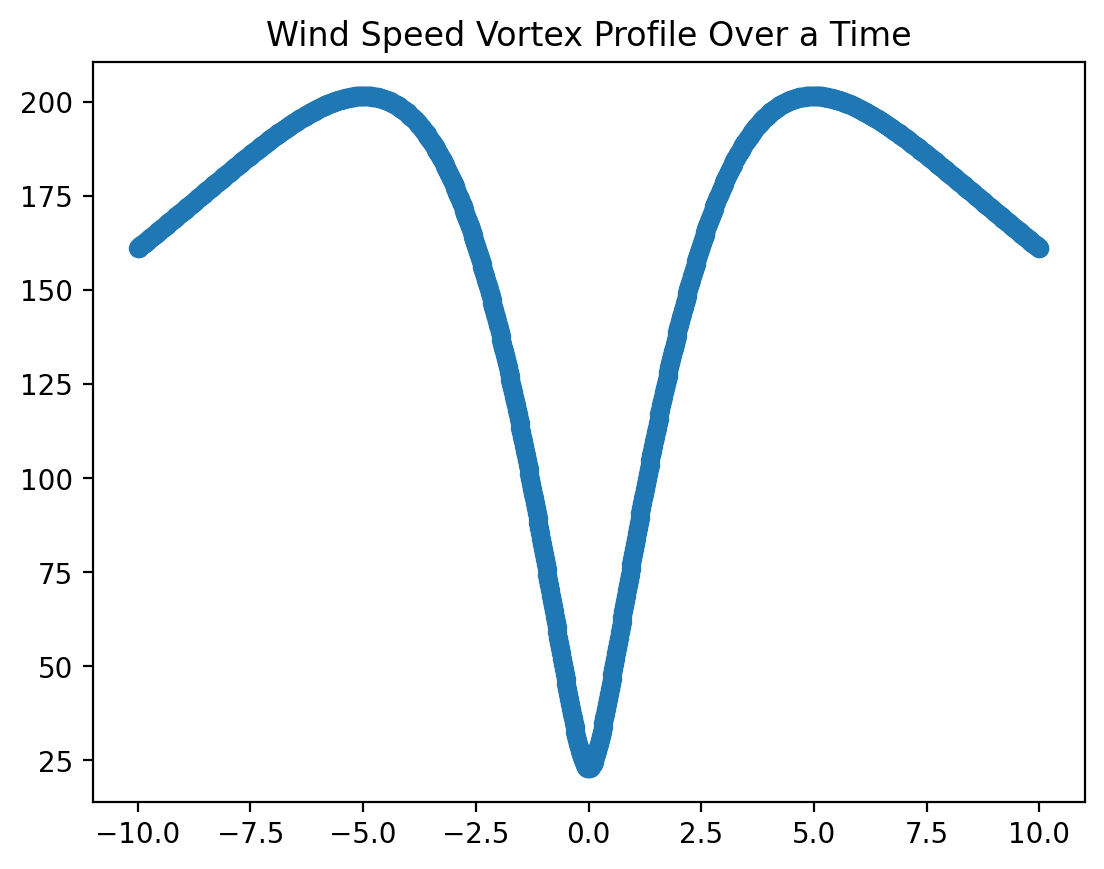

In [6]:
time = np.linspace(-10, 10, 1000)
max_wind_speed = 23
u_1 = 3.5
slope = 1.
t0 = 0.
Gamma = 10
expected = 0.0000910710

# Create a wind speed time series
profile = ut.wind_vortex_profile(max_wind_speed, u_1, slope, time, t0, Gamma)
wt = met.WindSpeedTimeseries(time, profile)
plt.scatter(wt.time, wt.data)
plt.title("Wind Speed Vortex Profile Over a Time")


In [ ]:
# Get init_params
init_params = wt._determine_init_params(vortex)
# Get bounds
bounds = wt._determine_bounds(vortex, init_params)

In [ ]:
# fit vortex: returns fit parameters and uncertainties
popt, unc = ut.fit_vortex_ws(vortex, init_params, bounds)
print(popt)
print(unc)